# Bonus: Data Processing and Graphing Demo

This is an exploration of cleaning up data for purposes of graphing.  Run the cell just below to set up the graphing features. Then read through the cells in order to follow the explanations.  You don't need to remember this stuff long term; it's mostly for fun so you can see what more complex programs accomplish.

In [81]:
# Run this before you run the cells below.  It sets up our data tools.
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

We want a big chunk of data for purposes of showing some graphing.  We're going to load this from a comma-separated values file (csv) which is similar to an Excel spreadsheet.  We'll use a csv of research information provided by Tech Crunch, on venture capital funding for companies.

A "data frame" is a matrix of rows of data, where each column is a consistent kind of data.  The pandas library makes a data frame available with a lot of awesome features to make data handling easier.

In [85]:
csvdata = pd.read_csv("TechCrunch.csv")
csvdata.head()

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,NaN,web,Phoenix,AZ,1-Feb-08,3000000,USD,a


Let's pull out the list company name, state, and raised amount, as its own data frame.

In [86]:
simpler = csvdata[['company', 'state', 'raisedAmt']]
simpler.head()

,company,state,raisedAmt
0,LifeLock,AZ,6850000
1,LifeLock,AZ,6000000
2,LifeLock,AZ,25000000
3,MyCityFaces,AZ,50000
4,Flypaper,AZ,3000000


That's only the "head" of the data frame (the first few rows).  How many are there total?  There are 3 columns and 1460 rows.

In [4]:
simpler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 3 columns):
company      1460 non-null object
state        1460 non-null object
raisedAmt    1460 non-null int64
dtypes: int64(1), object(2)
memory usage: 45.6+ KB


Let's get some statistics about this set of data, including the mean (average) and the standard deviation (how far different from the mean does the data tend to be).

In [5]:
simpler.describe()

,raisedAmt
count,1.460000e+03
mean,1.013149e+07
std,1.866146e+07
min,6.000000e+03
25%,2.000000e+06
50%,5.500000e+06
75%,1.102500e+07
max,3.000000e+08


Now let's figure out the average amount raised in each state.

In [34]:
bystate_averages = simpler.groupby("state").mean()
bystate_averages

,raisedAmt
state,
AZ,5613750
CA,10723235
CO,3832424
CT,17895769
DC,9371000
FL,13900818
GA,7332500
IA,225000
ID,2750000


We'd like to plot a bar graph with the state on the X axis and the amount on the Y axis.  But to do that, we need the state as a column, not just as a row identifier.  This is a subtle difference for a person but a big difference for the computer.  So we need to reshape the data a bit.

In [42]:
bystate_averages["state"] = list(bystate_averages.index)
bystate_averages.head()

,raisedAmt,state
state,,
AZ,5613750,AZ
CA,10723235,CA
CO,3832424,CO
CT,17895769,CT
DC,9371000,DC


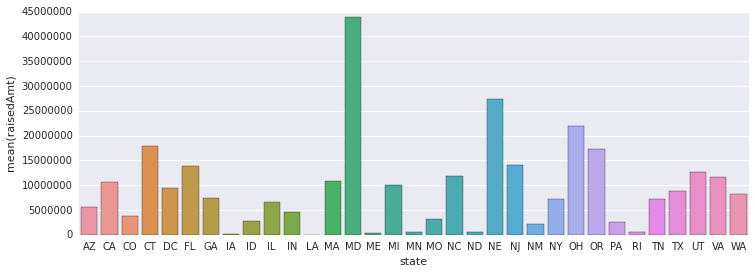

In [97]:

# Setting image size so it's readable; 12 wide by 4 high.
sns.set_context(rc={"figure.figsize": (12, 4)})

# Prepare an axis format such that only numbers smaller than 10^-3 or
# larger than 10^9 would use scientific notation.  This avoids it for
# the range we care about.
from matplotlib.ticker import ScalarFormatter
xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,9))

# Create a bar plot with our data source, state on the x axis, amount on the y axis
axes = sns.barplot(data=bystate_averages, x="state", y="raisedAmt")

# Actually turn off y-axis scientific notation, using the format created earlier.
axes.yaxis.set_major_formatter(xfmt)


Which state had the highest "average amount raised"?  What about second highest?

Let's make it more readable by sorting the data by amount raised.

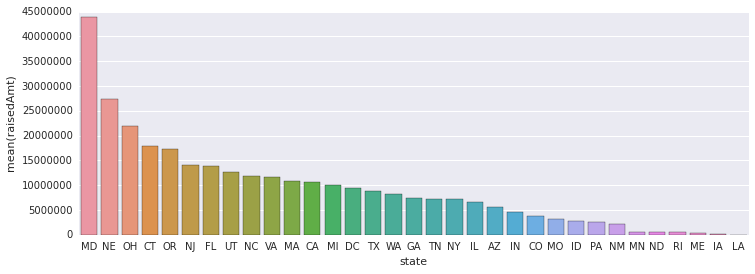

In [80]:
# Create a bar plot with our data source, state on the x axis, amount on the y axis
axes = sns.barplot(data=bystate_averages.sort(["raisedAmt"], ascending=False), x="state", y="raisedAmt")

# Actually turn off y-axis scientific notation, using the format created earlier.
axes.yaxis.set_major_formatter(xfmt)


Now let's compare average amount raised by business category and which round of venture capital funding it was (a, b, c, etc).

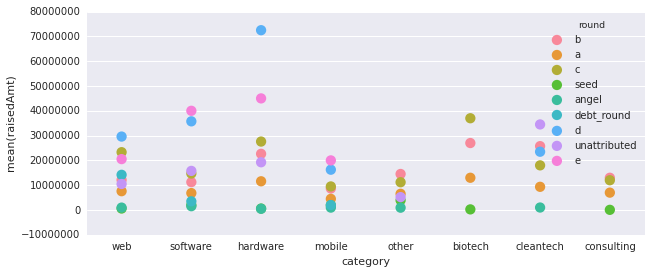

In [104]:
sns.set_context(rc={"figure.figsize": (10, 4)})

axes = sns.pointplot(data=csvdata, x="category", y="raisedAmt", hue="round", 
                     ci=None, join=False, size=9, legend_out=True)
axes.yaxis.set_major_formatter(xfmt)


As you can see, using pandas dataframes to hold data, and seaborn to plot graphs, make it far quicker to get interesting meaning from the data.  The string processing you did previously is a typical step in preparing the CSV file of data ahead of pulling it into a dataframe.

As you continue learning to program, you will learn how to work with files as well as more complex kinds of data.  At its core, all computing is about data; even when you don't see it graphed, it's still entered and saved.  Your phone call records are data.  Your electric bill is data.  Your water bill is data.  The list of groceries you buy is data.  The classes you attend at school are data, and the books you order are data.  The games you play also generate data - some inside the game for points and scores and aiming and levels, and some outside the game, for how often you play the game and whether you play with any friends.

Learning to program means learning how to model the world with data.  It means thinking flexibly about variables and what's in them and how we get their contents and where we save them after we have them.  Sometimes we save to files, and sometimes to databases.  Sometimes we transfer the information over the internet to save it somewhere else.  Whether one row at a time, or one million rows at a time, computing is about data.
